# PREDICTING ELECTRICITY PRICES FOR A SOLAR ENERGY COMPANY IN AUSTRALIA

Solarays Energy company builds solar panel arrays and then sells the energy they produce to industrial customers. The company wants to expand to the city of Melbourne in the state of Victoria. 

Prices and demand for electricity change every day. Customers pay for the energy received using a formula based on the local energy market's daily price.

The company's pricing committee wants to estimate energy prices for the next 12-18 months to use those prices as the basis for contract negotiations. Hence, they got in touch with a data scientist to help resolve and unravel this issues.


### Questions to meditate on


1. How do energy prices change throughout the year?
2. Are there any patterns by season or month of the year?
3. Build a forecast of daily energy prices the company can use as the basis of its financial planning.


##### The dataset consist of over five years of energy price and demand data between 2015-2020

In [599]:
import pandas as pd
data_df=pd.read_csv('complete_dataset.csv')

In [600]:
data_df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [601]:
data_df.shape

(2106, 14)

In [602]:
type(data_df)

pandas.core.frame.DataFrame

In [603]:
data_df.describe()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2105.000000,2103.000000
mean,120035.476503,76.079554,119252.305055,76.553847,783.171448,-2.686052,0.008547,11.582289,20.413200,14.743373,1.505944
std,13747.993761,130.246805,14818.631319,130.114184,3578.920686,19.485432,0.039963,4.313711,6.288693,7.945527,4.307897
min,85094.375000,-6.076028,41988.240000,13.568986,0.000000,-342.220000,0.000000,0.600000,9.000000,0.700000,0.000000
25%,109963.650000,38.707040,109246.250000,39.117361,0.000000,0.000000,0.000000,8.500000,15.525000,8.200000,0.000000
50%,119585.912500,66.596738,119148.082500,66.869058,0.000000,0.000000,0.000000,11.300000,19.100000,12.700000,0.000000
75%,130436.006250,95.075012,130119.477500,95.130181,0.000000,0.000000,0.000000,14.600000,23.900000,20.700000,0.800000
max,170653.840000,4549.645105,170653.840000,4549.645105,57597.595000,0.000000,0.625000,28.000000,43.500000,33.300000,54.600000


# Extracting Data from the  Date column

The date column is very important in order to get insights or trends on the performance of the solar company prices and demands over the months or years

In [604]:
#lets check for the data type of the date column
data_df.dtypes

date                object
demand             float64
RRP                float64
demand_pos_RRP     float64
RRP_positive       float64
demand_neg_RRP     float64
RRP_negative       float64
frac_at_neg_RRP    float64
min_temperature    float64
max_temperature    float64
solar_exposure     float64
rainfall           float64
school_day          object
holiday             object
dtype: object

In [605]:
#we can see from above that the data type for the date is an object
#lets change the data type of the date from object to datetime
data_df['date']=pd.to_datetime(data_df['date'])
data_df.dtypes

date               datetime64[ns]
demand                    float64
RRP                       float64
demand_pos_RRP            float64
RRP_positive              float64
demand_neg_RRP            float64
RRP_negative              float64
frac_at_neg_RRP           float64
min_temperature           float64
max_temperature           float64
solar_exposure            float64
rainfall                  float64
school_day                 object
holiday                    object
dtype: object

In [606]:
#lets create new columns from the date column
data_df['month_name'] = data_df['date'].dt.month_name()
data_df['month'] = data_df['date'].dt.month
data_df['day_name'] = data_df['date'].dt.day_name()
data_df['day'] = data_df['date'].dt.weekday
data_df['year']= data_df['date'].dt.year
data_df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,month_name,month,day_name,day,year
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y,January,1,Thursday,3,2015
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N,January,1,Friday,4,2015
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N,January,1,Saturday,5,2015
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N,January,1,Sunday,6,2015
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N,January,1,Monday,0,2015


In [607]:
data_df.dtypes

date               datetime64[ns]
demand                    float64
RRP                       float64
demand_pos_RRP            float64
RRP_positive              float64
demand_neg_RRP            float64
RRP_negative              float64
frac_at_neg_RRP           float64
min_temperature           float64
max_temperature           float64
solar_exposure            float64
rainfall                  float64
school_day                 object
holiday                    object
month_name                 object
month                       int64
day_name                   object
day                         int64
year                        int64
dtype: object

Since we hace extrated or broken down the date column into day, month and year, its time to drop or remove the date column.

In [608]:
data_df.drop(labels='date', axis=1, inplace=True)


In [609]:
data_df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,month_name,month,day_name,day,year
0,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y,January,1,Thursday,3,2015
1,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N,January,1,Friday,4,2015
2,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N,January,1,Saturday,5,2015
3,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N,January,1,Sunday,6,2015
4,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N,January,1,Monday,0,2015


# Data Visualization

In [610]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

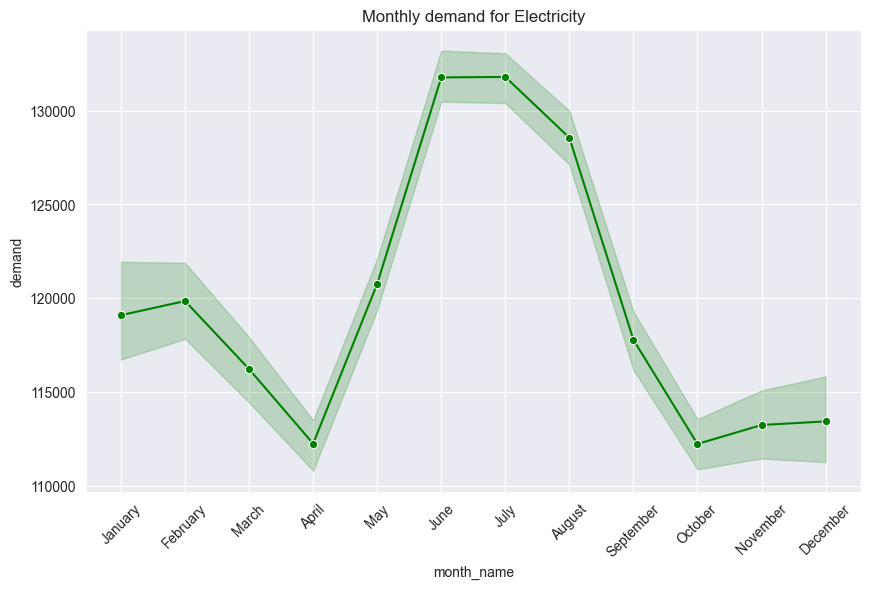

In [611]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_df,x='month_name',y='demand', marker='o',color='green')
plt.title('Monthly demand for Electricity')
plt.grid()
sns.set_style('dark')
plt.xticks(rotation=45)


There is always a higher demand for electricity for the month of April, May, June, July. The demand rose from 112,000 MWH in April to 133,000 MWH in June and July. This means that solarays would be making a lot of money during this period because of the high demand of electricity as customers would be paying more. But what could be the reason for these high demand? 

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'January'),
  Text(1, 0, 'February'),
  Text(2, 0, 'March'),
  Text(3, 0, 'April'),
  Text(4, 0, 'May'),
  Text(5, 0, 'June'),
  Text(6, 0, 'July'),
  Text(7, 0, 'August'),
  Text(8, 0, 'September'),
  Text(9, 0, 'October'),
  Text(10, 0, 'November'),
  Text(11, 0, 'December')])

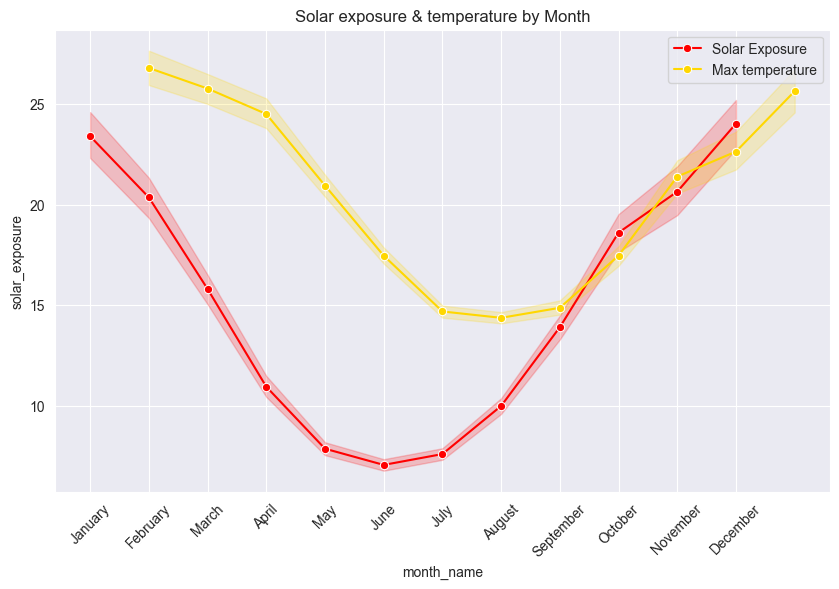

In [612]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data_df,x='month_name',y='solar_exposure',marker='o',color='red',label='Solar Exposure')
sns.lineplot(data=data_df,x='month',y='max_temperature', marker='o',color='gold',label='Max temperature')
plt.title('Solar exposure & temperature by Month')
plt.grid()
sns.set_style('dark')
plt.xticks(rotation=45)


The trend above shows that solar exposure and temperature tends to fall from january all through to july and starts increasing again from August till january. But it seems the months of may, june and july experience the lowest so far. As the sunlight energy drop from 11 MJ/m2 in April to 7 MJ/m2 in july.
This best explains the reason why the electricity demand was high during the months of may, june and july in initial lineplot above because of the drop in sunlight energy and temperature . 

Lets further confirm  if there are any correlation between solar exposure and max temperature using the regplot.

<AxesSubplot: xlabel='max_temperature', ylabel='solar_exposure'>

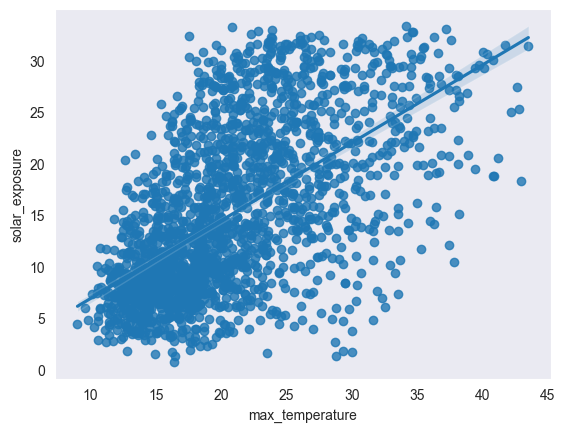

In [613]:
sns.regplot(x=data_df['max_temperature'], y=data_df['solar_exposure'])

The plot aboves together with the trend line confirms that solar exposure and max temperature are positively correlated. So this means that as solar exposure decreases, temperature also decreases and vice versa.

lets visualize the quality of categorical data present in the school day and holiday columns and we would decide which to keep or drop.

C:\Users\Digital Media\AppData\Local\Temp\ipykernel_29900\2411650752.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=data_df.corr(), vmax=1, square=True,annot=True,cmap='viridis')


Text(0.5, 1.0, 'Correlation between Different Features')

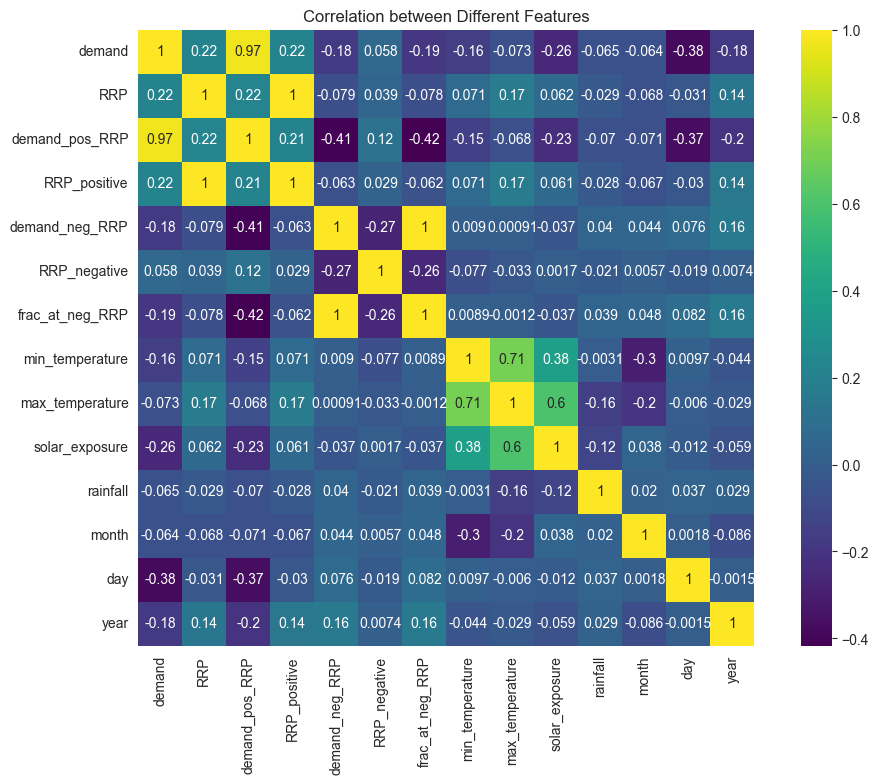

In [614]:
plt.figure(figsize=(12,8))
sns.heatmap(data=data_df.corr(), vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between Different Features')

The heatmap further confirms that some features are correlated like demand and RRP, Max temperature and solar_exposure etc. (pay attention to the colors in yellow and light green)

<AxesSubplot: xlabel='school_day', ylabel='count'>

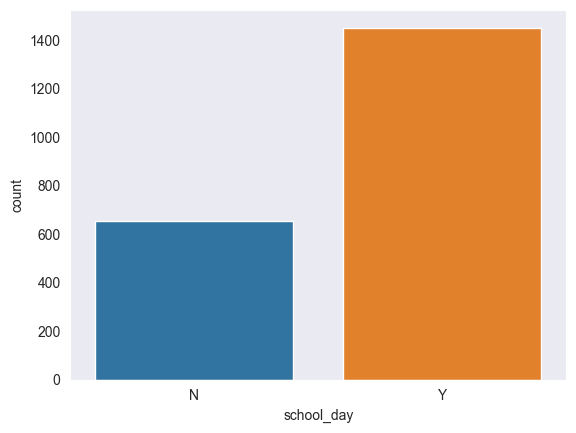

In [615]:
sns.countplot(x='school_day',data=data_df)

The column 

<AxesSubplot: xlabel='holiday', ylabel='count'>

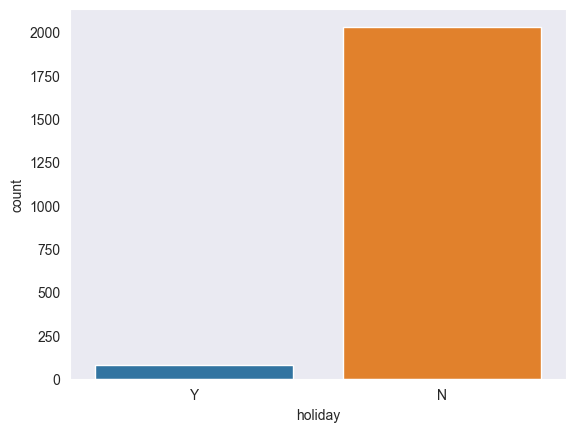

In [616]:
sns.countplot(x='holiday',data=data_df)

The holiday column is very much biased, as it only contains 1 categorical variable. Keeping this column could affect our result when training the data. Hence we would have to drop it.

In [617]:
#lets remove the holiday column
data_df.drop(labels='holiday',axis=1, inplace=True)
data_df.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month_name,month,day_name,day,year
0,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,January,1,Thursday,3,2015
1,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,January,1,Friday,4,2015
2,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,January,1,Saturday,5,2015
3,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,January,1,Sunday,6,2015
4,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,January,1,Monday,0,2015


<AxesSubplot: xlabel='demand', ylabel='Count'>

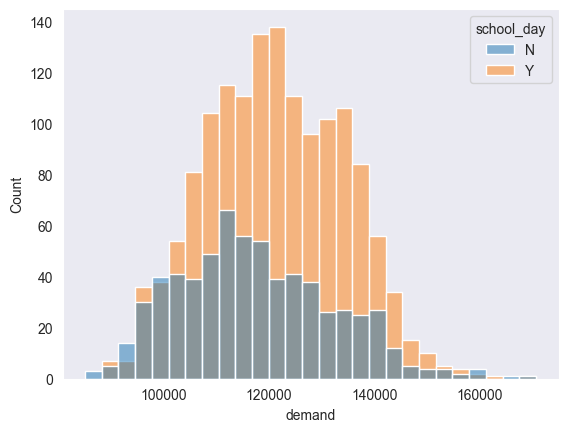

In [709]:
sns.histplot(x=data_df['demand'] ,hue=data_df['school_day'])

The histogram shows that the electricity demand is always high whenever there is school day and electricty demand tends to be low when there is no school day. But how can this affect the prices of eletcricity? For better and accurate prediction, lets check for outliers.

# Outliers

Outliers are extreme values that are outside the range of what is expected and can sometimes skew the distribution of the data. Lets visualize the distribution of each features.

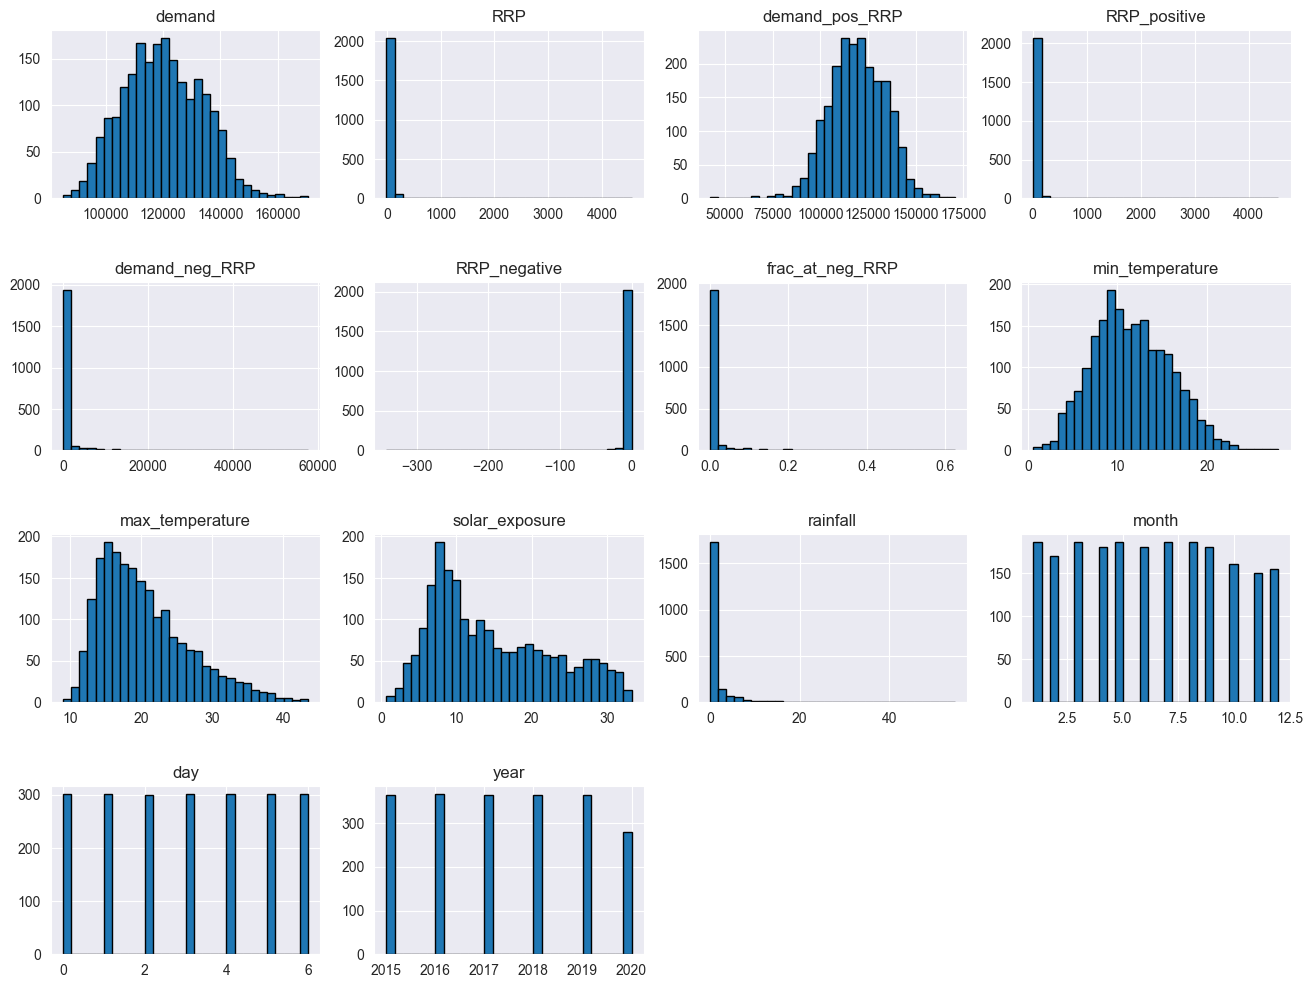

In [620]:
data_df.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.2)

Features like demand, demand_pos_RRP, min_temeperature, max_temperature, solar_exposure are Evenly Distributed because they tend to have a bell shaped curved. While the rest of the features or columns described by the histogram above are not well distributed and they looked skewed, this could be as a result of the presence of outliers.

In [621]:
#lets seperate the columns or features containing outliers
outliers_of_interest = ['RRP','RRP_positive','demand_neg_RRP','RRP_negative','frac_at_neg_RRP','rainfall']

In [622]:
data_df[outliers_of_interest].describe()

,RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,rainfall
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2103.000000
mean,76.079554,76.553847,783.171448,-2.686052,0.008547,1.505944
std,130.246805,130.114184,3578.920686,19.485432,0.039963,4.307897
min,-6.076028,13.568986,0.000000,-342.220000,0.000000,0.000000
25%,38.707040,39.117361,0.000000,0.000000,0.000000,0.000000
50%,66.596738,66.869058,0.000000,0.000000,0.000000,0.000000
75%,95.075012,95.130181,0.000000,0.000000,0.000000,0.800000
max,4549.645105,4549.645105,57597.595000,0.000000,0.625000,54.600000


There is a big gap or noticeable difference between the max and the 75th percentile, it is another evidence that the features contain outliers. Lets check for outliers in the features using boxplot in the seaborn library.

Text(0.5, 1.0, 'Rainfall')

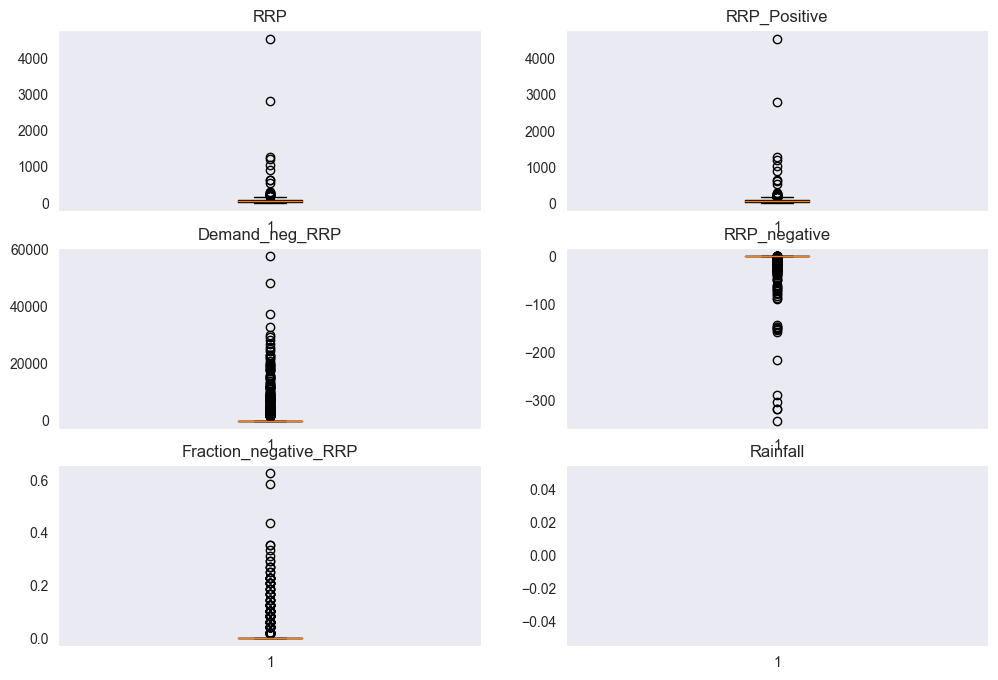

In [623]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(3,2,figsize=(12,8))

axis[0, 0].boxplot(x=data_df['RRP'])
axis[0, 0].set_title("RRP")

axis[0, 1].boxplot(x=data_df['RRP_positive'])
axis[0, 1].set_title("RRP_Positive")

axis[1, 0].boxplot(x=data_df['demand_neg_RRP'])
axis[1, 0].set_title("Demand_neg_RRP")

axis[1, 1].boxplot(x=data_df['RRP_negative'])
axis[1, 1].set_title("RRP_negative")

axis[2, 0].boxplot(x=data_df['frac_at_neg_RRP'])
axis[2, 0].set_title("Fraction_negative_RRP")

axis[2, 1].boxplot(x=data_df['rainfall'])
axis[2, 1].set_title("Rainfall")

The visualization reaffirms that there are outliers present in those features. The dots dispalying are the extreme values that need to be removed.

# Using Interquatile Rule to remove outliers

To find the outliers in a variable, we need to find the distribution boundaries according to the IQR proximity rule.

In [624]:
def find_boundaries(df, variable, distance):

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [625]:
#removing outliers across multiple variables
RRP_upper_limit, RRP_lower_limit = find_boundaries(data_df, 'RRP', 1.5)
RRP_P_upper_limit, RRP_P_lower_limit = find_boundaries(data_df, 'RRP_positive', 1.5)
demand_np_upper_limit, demand_np_lower_limit = find_boundaries(data_df, 'demand_neg_RRP', 1.5)
RRP_n_upper_limit, RRP_n_lower_limit = find_boundaries(data_df, 'RRP_negative', 1.5)
fanp_upper_limit, fanp_lower_limit = find_boundaries(data_df, 'frac_at_neg_RRP', 1.5)
rainfall_upper_limit, rainfall_lower_limit = find_boundaries(data_df, 'rainfall', 1.5)

In [626]:
import numpy as np
outliers_RRP = np.where(data_df['RRP'] > RRP_upper_limit, True,
              np.where(data_df['RRP'] < RRP_lower_limit, True, False))

outliers_RRP_P = np.where(data_df['RRP_positive'] > RRP_P_upper_limit, True,
                 np.where(data_df['RRP_positive'] < RRP_P_lower_limit, True, 
                 False))


outliers_demand_np = np.where(data_df['demand_neg_RRP'] > demand_np_upper_limit, True,
                 np.where(data_df['demand_neg_RRP'] < demand_np_lower_limit, True, 
                 False))



outliers_RRP_n = np.where(data_df['RRP_negative'] > RRP_n_upper_limit, True,
                 np.where(data_df['RRP_negative'] < RRP_n_lower_limit, True, 
                 False))



outliers_fanp = np.where(data_df['frac_at_neg_RRP'] > fanp_upper_limit, True,
                np.where(data_df['frac_at_neg_RRP'] < fanp_lower_limit, True, 
                False))


outliers_rainfall = np.where(data_df['rainfall'] > rainfall_upper_limit, True,
                 np.where(data_df['rainfall'] < rainfall_lower_limit, True, 
                 False))


In [627]:
#Finally, let's remove the observations with outliers in any of the variables:
data_trimmed = data_df.loc[~(outliers_RRP + outliers_RRP_P + outliers_demand_np + outliers_RRP_n + outliers_fanp + outliers_rainfall)]

Text(0.5, 1.0, 'Rainfall')

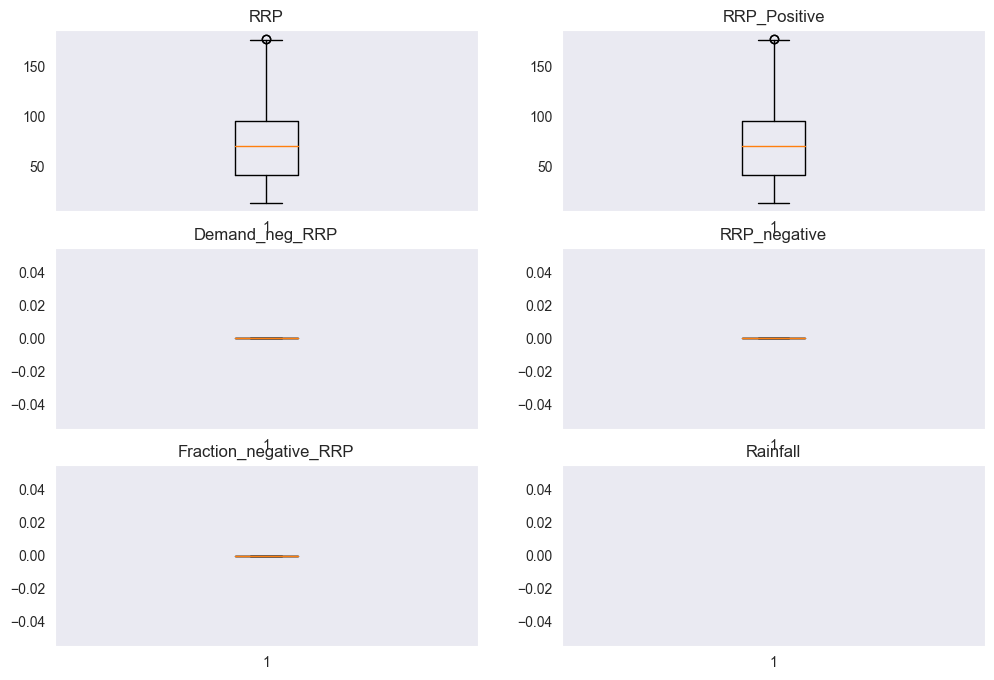

In [628]:
# visualize the columns to check if outliers still exists
figure, axis = plt.subplots(3,2,figsize=(12,8))

axis[0, 0].boxplot(x=data_trimmed['RRP'])
axis[0, 0].set_title("RRP")

axis[0, 1].boxplot(x=data_trimmed['RRP_positive'])
axis[0, 1].set_title("RRP_Positive")

axis[1, 0].boxplot(x=data_trimmed['demand_neg_RRP'])
axis[1, 0].set_title("Demand_neg_RRP")

axis[1, 1].boxplot(x=data_trimmed['RRP_negative'])
axis[1, 1].set_title("RRP_negative")

axis[2, 0].boxplot(x=data_trimmed['frac_at_neg_RRP'])
axis[2, 0].set_title("Fraction_negative_RRP")

axis[2, 1].boxplot(x=data_trimmed['rainfall'])
axis[2, 1].set_title("Rainfall")

In [629]:
data_trimmed[outliers_of_interest].describe()

,RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,rainfall
count,1580.000000,1580.000000,1580.0,1580.0,1580.0,1577.000000
mean,71.502987,71.502987,0.0,0.0,0.0,0.217882
std,33.881762,33.881762,0.0,0.0,0.0,0.468402
min,13.568986,13.568986,0.0,0.0,0.0,0.000000
25%,41.477395,41.477395,0.0,0.0,0.0,0.000000
50%,71.115834,71.115834,0.0,0.0,0.0,0.000000
75%,95.998315,95.998315,0.0,0.0,0.0,0.200000
max,178.079675,178.079675,0.0,0.0,0.0,2.000000


We can see that the difference between the max and the 75th percentile is very close, thus is another evidence that outliers are no longer present in the features

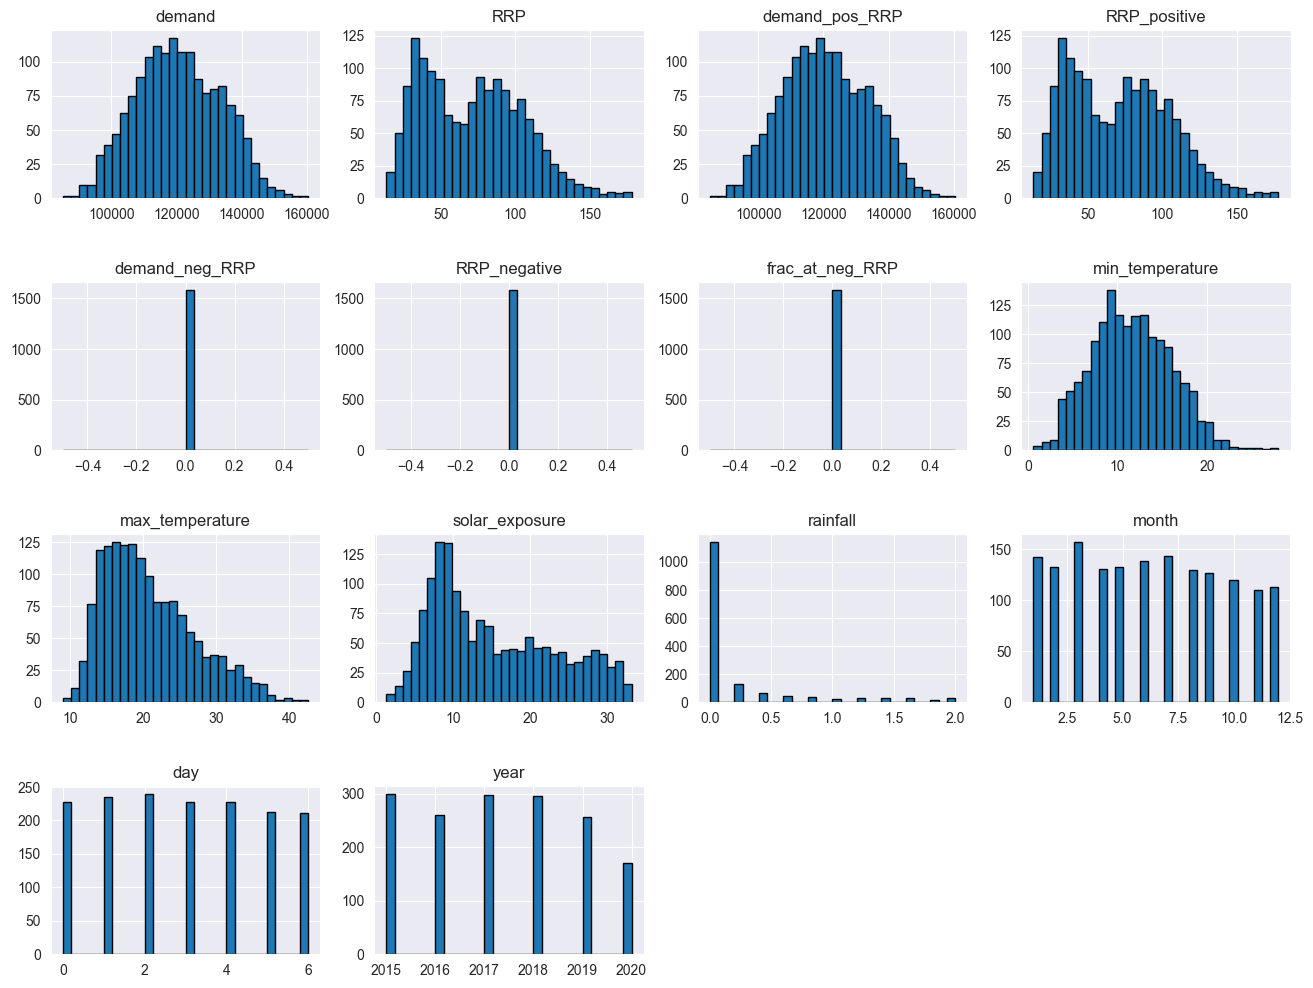

In [630]:
#lets check for the distribution once again
data_trimmed.hist(figsize=(16, 12), bins=30, edgecolor="black")
plt.subplots_adjust(hspace=0.5, wspace=0.2)

The features looks better compared to how it was before when outliers are present especially the RRP feature. The other feature with no gaussian distribution contains negative and zero values.

In [631]:
data_trimmed['RRP'].sort_values(ascending=False)

1476    178.079675
1436    177.861817
1481    176.689950
519     175.854630
1477    175.352893
           ...    
30       16.538847
710      16.396688
458      15.804000
306      14.157948
457      13.568986
Name: RRP, Length: 1580, dtype: float64

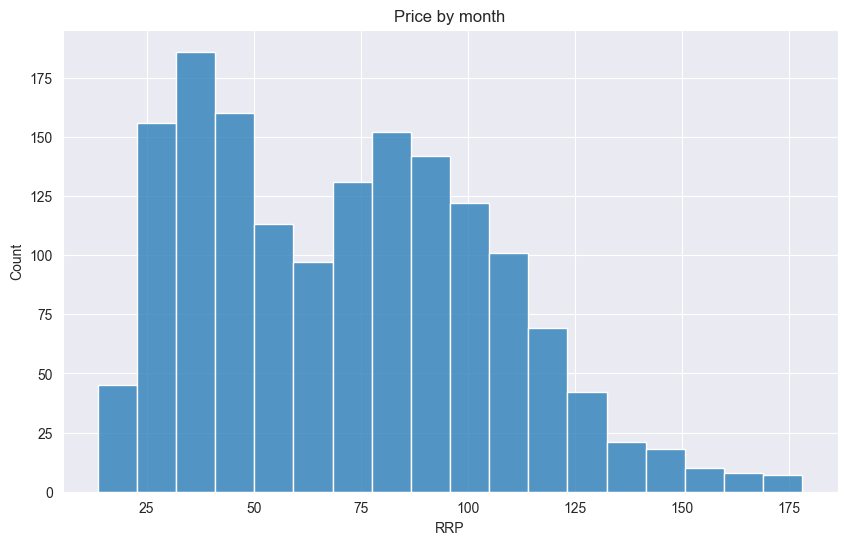

In [632]:
#Now that our the RRP (recommended price) is free from outliers, we can visualize its distribution
plt.figure(figsize=(10,6))
sns.histplot(data_trimmed['RRP'])
plt.title('Price by month')
plt.grid()
sns.set_style('dark')



The highest retail price sold for electricity by solaray is 178 AUD/MWH while the lowest is 13 AUD/MWH

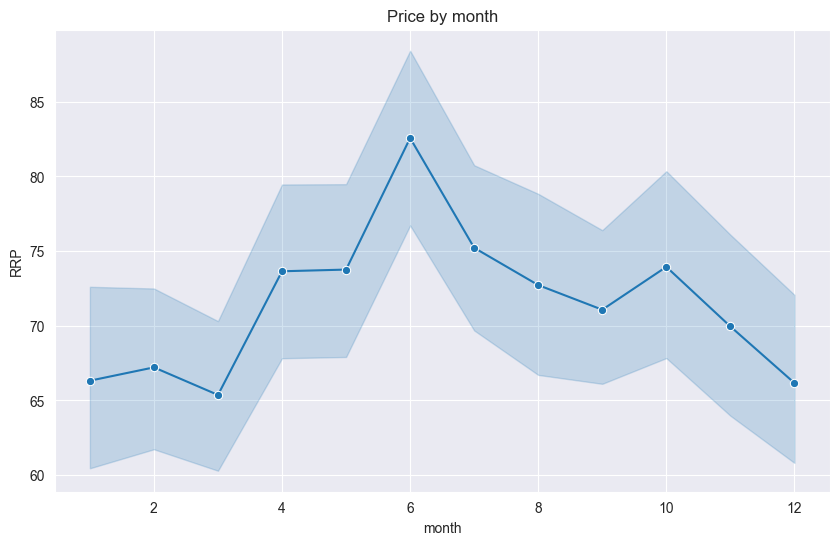

In [693]:
#Now that our the RRP (recommended price) is free from outliers, we can visualize its distribution
plt.figure(figsize=(10,6))
sns.lineplot(y=data_trimmed['RRP'], x=data_trimmed['month'], marker='o')
plt.title('Price by month')
plt.grid()
sns.set_style('dark')



<AxesSubplot: xlabel='RRP', ylabel='demand'>

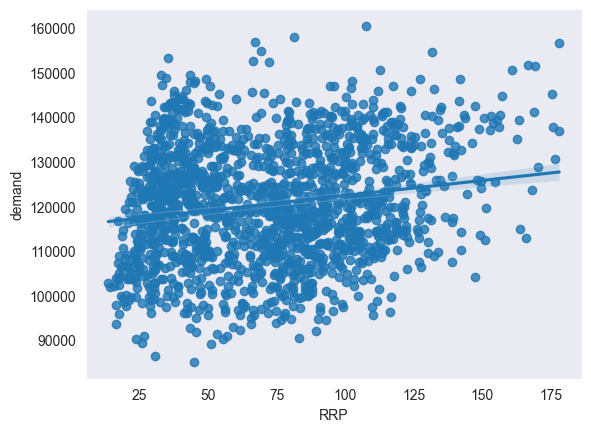

In [685]:
sns.regplot(x=data_trimmed['RRP'], y=data_trimmed['demand'])

The above plot shows that as demand for electricity increases, the retail price would also increase.

<AxesSubplot: xlabel='school_day', ylabel='RRP'>

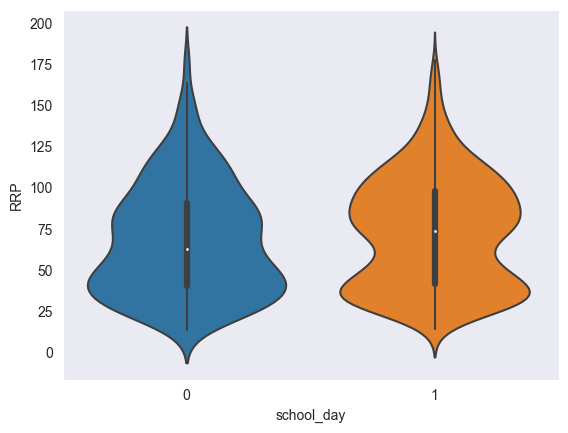

In [700]:
sns.violinplot(x=data_trimmed['school_day'],y=data_trimmed['RRP'])

The recommended retailer price (RRP) tends to be always high when there is a school day.

# Checking for missing values and Replacing categorical variables

In [634]:
data_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1580 entries, 2 to 2105
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   demand           1580 non-null   float64
 1   RRP              1580 non-null   float64
 2   demand_pos_RRP   1580 non-null   float64
 3   RRP_positive     1580 non-null   float64
 4   demand_neg_RRP   1580 non-null   float64
 5   RRP_negative     1580 non-null   float64
 6   frac_at_neg_RRP  1580 non-null   float64
 7   min_temperature  1580 non-null   float64
 8   max_temperature  1580 non-null   float64
 9   solar_exposure   1580 non-null   float64
 10  rainfall         1577 non-null   float64
 11  school_day       1580 non-null   object 
 12  month_name       1580 non-null   object 
 13  month            1580 non-null   int64  
 14  day_name         1580 non-null   object 
 15  day              1580 non-null   int64  
 16  year             1580 non-null   int64  
dtypes: float64(11)

In [635]:
# replacing the categorical inputs in school day column into 0 and 1
data_trimmed['school_day'].replace({'N': 0, 'Y': 1}, inplace = True)
data_trimmed.head()

C:\Users\Digital Media\AppData\Local\Temp\ipykernel_29900\3573228682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed['school_day'].replace({'N': 0, 'Y': 1}, inplace = True)


,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month_name,month,day_name,day,year
2,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,January,1,Saturday,5,2015
4,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,January,1,Monday,0,2015
5,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,January,1,Tuesday,1,2015
8,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,January,1,Friday,4,2015
10,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,January,1,Sunday,6,2015


In [636]:
#lets confirm the unique values in the schoolday column
data_trimmed['school_day'].unique()

array([0, 1], dtype=int64)

In [637]:
# We need to get rid of the month_name and day_name since we are no longer needing it for visualization
data_trimmed.drop(labels=['month_name', 'day_name'], axis=1, inplace=True)

C:\Users\Digital Media\AppData\Local\Temp\ipykernel_29900\2050433331.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trimmed.drop(labels=['month_name', 'day_name'], axis=1, inplace=True)


In [638]:
data_trimmed.head()

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
2,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
4,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
5,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
8,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
10,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015


In [639]:
#checking for missing values
data_trimmed.isnull().sum().sort_values(ascending=True)

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
school_day         0
month              0
day                0
year               0
rainfall           3
dtype: int64

In [673]:
#ltes replace the mssing values with 0
data_trimmed=data_trimmed.fillna(0)
data_trimmed.head(10)


,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
2,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
4,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
5,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
8,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
10,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015
11,131261.125,33.694810,131261.125,33.694810,0.0,0.0,0.0,16.1,31.3,31.6,0.0,0,1,0,2015
12,126527.360,27.537864,126527.360,27.537864,0.0,0.0,0.0,20.2,25.6,4.2,0.0,0,1,1,2015
14,118411.220,30.936539,118411.220,30.936539,0.0,0.0,0.0,15.8,20.0,14.6,0.0,0,1,3,2015
15,116690.765,23.015191,116690.765,23.015191,0.0,0.0,0.0,13.1,27.3,30.3,0.0,0,1,4,2015
16,99371.310,18.994927,99371.310,18.994927,0.0,0.0,0.0,15.9,25.0,27.5,0.0,0,1,5,2015


In [641]:
data_trimmed.reset_index(drop=True)

,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
0,142300.540,34.564855,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
1,118132.200,26.724176,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
2,130672.485,31.282311,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
3,121801.155,34.490675,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
4,99865.755,18.234768,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1575,115643.440,34.696676,115643.440,34.696676,0.0,0.0,0.0,11.8,15.5,9.4,0.8,0,9,3,2020
1576,112335.700,40.837043,112335.700,40.837043,0.0,0.0,0.0,8.4,18.7,13.6,0.0,0,9,4,2020
1577,117535.715,51.779356,117535.715,51.779356,0.0,0.0,0.0,8.2,15.0,13.9,1.6,0,9,3,2020
1578,114651.140,59.746053,114651.140,59.746053,0.0,0.0,0.0,6.5,13.6,18.3,0.0,0,9,0,2020


In [642]:
#Checking if there are still missing values
data_trimmed.isnull().sum().sort_values(ascending=True)

demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
month              0
day                0
year               0
dtype: int64

# Splitting our data into train and test

In [643]:
#lets filter the columns 
features_x=['demand','demand_pos_RRP','RRP_positive','demand_neg_RRP','RRP_negative','frac_at_neg_RRP','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day','year']
X=data_trimmed[features_x]
X.head()

,demand,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
2,142300.540,142300.540,34.564855,0.0,0.0,0.0,20.0,38.2,26.5,0.0,0,1,5,2015
4,118132.200,118132.200,26.724176,0.0,0.0,0.0,15.0,22.0,30.7,0.0,0,1,0,2015
5,130672.485,130672.485,31.282311,0.0,0.0,0.0,17.7,26.0,31.6,0.0,0,1,1,2015
8,121801.155,121801.155,34.490675,0.0,0.0,0.0,16.5,18.0,3.1,1.2,0,1,4,2015
10,99865.755,99865.755,18.234768,0.0,0.0,0.0,15.6,27.5,29.9,0.0,0,1,6,2015


In [644]:
#lets filter the target (the price)
y=data_trimmed.RRP
y.head()

2     34.564855
4     26.724176
5     31.282311
8     34.490675
10    18.234768
Name: RRP, dtype: float64

In [645]:
#its time to split our data into for training and testing
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state =0)

In [646]:
train_X.head()

,demand,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day,year
1635,146856.800,146856.800,117.518961,0.0,0.0,0.0,4.2,16.0,9.0,0.0,1,6,0,2019
1438,102161.115,102161.115,80.188788,0.0,0.0,0.0,16.0,20.1,11.8,1.2,1,12,6,2018
888,136116.120,136116.120,105.696168,0.0,0.0,0.0,5.9,14.3,9.2,0.0,1,6,2,2017
592,127906.240,127906.240,39.838938,0.0,0.0,0.0,10.2,18.1,13.4,0.0,1,8,0,2016
1587,116318.435,116318.435,94.753714,0.0,0.0,0.0,7.4,18.7,11.7,0.0,1,5,1,2019


In [647]:
train_y.head()

1635    117.518961
1438     80.188788
888     105.696168
592      39.838938
1587     94.753714
Name: RRP, dtype: float64

# Feature Selection

In [701]:
from sklearn.feature_selection import RFE #Recursive Feature Elimination
from sklearn.ensemble import RandomForestRegressor #Random Forest for Feature Selection

In [702]:
model = RandomForestRegressor(n_estimators = 100,max_depth=10) 
#n_estimators : This is the number of trees you want to build before taking the maximum voting or averages of predictions.

rfe = RFE(model, n_features_to_select = 10)

In [650]:
fit_ = rfe.fit(train_X,train_y)

In [651]:
feature_rank = pd.DataFrame({"Features" : X.columns,
                             "Selected" : fit_.support_,
                             "Feature Rank" : fit_.ranking_})

feature_rank = feature_rank.sort_values(by="Feature Rank")

feature_rank

,Features,Selected,Feature Rank
0,demand,True,1
1,demand_pos_RRP,True,1
2,RRP_positive,True,1
6,min_temperature,True,1
7,max_temperature,True,1
8,solar_exposure,True,1
9,rainfall,True,1
11,month,True,1
12,day,True,1
13,year,True,1


In [652]:
#View the Selected Features
selected_feature_names = feature_rank.loc[feature_rank["Selected"] == True]
selected_feature_names

,Features,Selected,Feature Rank
0,demand,True,1
1,demand_pos_RRP,True,1
2,RRP_positive,True,1
6,min_temperature,True,1
7,max_temperature,True,1
8,solar_exposure,True,1
9,rainfall,True,1
11,month,True,1
12,day,True,1
13,year,True,1


In [653]:
#since we now know the top 10 most important faetures, lets filter and extract the features 
list(train_X.columns)

['demand',
 'demand_pos_RRP',
 'RRP_positive',
 'demand_neg_RRP',
 'RRP_negative',
 'frac_at_neg_RRP',
 'min_temperature',
 'max_temperature',
 'solar_exposure',
 'rainfall',
 'school_day',
 'month',
 'day',
 'year']

In [654]:
features_of_importance=['demand','demand_pos_RRP','RRP_positive','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day']

In [655]:
train_X=train_X[features_of_importance]
test_X=test_X[features_of_importance]

# Features Scaling

Many machine learning algorithms are sensitive to the scale and magnitude of the features.Thus, having features within a similar scale allows us to compare feature importance, and also helps algorithms converge faster, thus improving performance and training times. 

Standardization is the process of centering the variable at zero and standardizing the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation.

In [656]:
from sklearn.preprocessing import StandardScaler 

In [657]:
#Next, we'll set up a standard scaler transformer using StandardScaler() 
#from scikit-learn and fit it to the train set so that it learns each 
#variable's mean and standard deviation:
scaler = StandardScaler() #uses the mean and standard deviation
scaler.fit(train_X)

StandardScaler()

In [658]:
#Now, let's standardize the train and test sets with the trained scaler; 
#that is, we'll remove the variable's mean from each observation 
#and divide the result by the standard deviation:
train_X_scaled = scaler.transform(train_X)
test_X_scaled = scaler.transform(test_X)

In [659]:
train_X_scaled

array([[ 2.01229462,  2.01229462,  1.37609117, ...,  0.6718955 ,
        -0.07305702, -1.50913824],
       [-1.38898274, -1.38898274,  0.26547968, ...,  0.6718955 ,
         1.70931947,  1.52652146],
       [ 1.19494432,  1.19494432,  1.02435079, ...,  0.6718955 ,
        -0.07305702, -0.49725167],
       ...,
       [ 0.28672967,  0.28672967,  1.31483985, ...,  0.6718955 ,
        -0.96424527,  0.00869161],
       [-2.35984591, -2.35984591, -1.35125216, ..., -1.48832667,
        -1.55837077,  1.52652146],
       [-0.11107214, -0.11107214,  1.14474753, ...,  0.6718955 ,
        -0.07305702,  1.52652146]])

Whenever we standardize our data, it usually converts its to a numpy array. So we need to convert it back to a dataframe.

In [660]:
#Put the Numpy Array into Pandas Dataframe
train_X_scaled= pd.DataFrame(train_X_scaled, columns=['demand','demand_pos_RRP','RRP_positive','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day'])

In [661]:
#Put the Numpy Array into Pandas Dataframe
test_X_scaled= pd.DataFrame(test_X_scaled, columns=['demand','demand_pos_RRP','RRP_positive','min_temperature','max_temperature','solar_exposure','rainfall','school_day','month','day'])

In [662]:
#lets confirm the if it has been converted to a dataframe
train_X_scaled.head()

,demand,demand_pos_RRP,RRP_positive,min_temperature,max_temperature,solar_exposure,rainfall,school_day,month,day
0,2.012295,2.012295,1.376091,-1.668006,-0.755087,-0.752990,-0.481591,0.671896,-0.073057,-1.509138
1,-1.388983,-1.388983,0.265480,1.024854,-0.095341,-0.404743,1.939499,0.671896,1.709319,1.526521
2,1.194944,1.194944,1.024351,-1.280052,-1.028640,-0.728115,-0.481591,0.671896,-0.073057,-0.497252
3,0.570184,0.570184,-0.934970,-0.298755,-0.417168,-0.205745,-0.481591,0.671896,0.521068,-1.509138
4,-0.311631,-0.311631,0.698801,-0.937739,-0.320620,-0.417181,-0.481591,0.671896,-0.370120,-1.003195


# Using Machine learning (Linear Regression) to predict electricity price. 

In [664]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score

In [665]:
# creating the model
reg_model= LinearRegression()

In [703]:
# fitting the model to train_X nd train _ y (Training data) so as to learn from them
reg_model.fit(train_X_scaled,train_y)

LinearRegression()

In [667]:
#using the model to predict the prices using the test data
y_pred = reg_model.predict(test_X_scaled)

## Evaluation Metrics

To measure the accuracy of our model and its prediction, we be using the Mean Absolute Error and R2 score.

In [668]:
print(mean_absolute_error(test_y, y_pred))

2.9219945731653487e-14


The lower the MAE, the more accurate the machine learning model

In [669]:
print(r2_score(test_y, y_pred))

1.0


The R2 score of 1 indicates that the regression predictions perfectly fit the data.

# CONCLUSION & RECOMMENDATION

##### The weather in Australia (Melbourne) is characterized as:
1. December - january : Summer
2. March - May : Autumn
3. June - August : Winter
4. Spetember - November : Spring

#### The visualization from previous data above shows that the demand for electricty is usually high during the Autumn and winter as temperature and sunlight energy tends to drop during this season . As a result of this, customers pay more for electricity as during this period. Solary Energy company can make more profit during this period (Autumn and Winter) by saving more electricity accumulated during the spring and summer (hot season) when sunlight energy is very high and  setting the recommended retailer Price (RRP) based on the season.